In [1]:
import os, yaml, sys
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

ENV = os.getenv("MY_ENV", "dev")
with open("../../config.yaml", "r") as f:
    config = yaml.safe_load(f)
paths = config[ENV]["paths"]
sys.path.append(paths["src_path"])
from data_preprocessing.preprocessing import min_max_normalization

In [2]:
data_path = f"{paths['livingstone_lab']}/tiziano/data"
monkey_name = "paul"
day = "0919"
npx = True
imec_n = 0
resolution_Hz = 100
if npx:
    neural_path = f"{data_path}/neural_{monkey_name}_25{day}_imec{imec_n}_{resolution_Hz}Hz.pkl"
    gaze_path = f"{data_path}/gaze_{monkey_name}_25{day}_imec{imec_n}_{resolution_Hz}Hz.pkl"
else:
    neural_path = f"{data_path}/neural_{monkey_name}_25{day}_plx_{resolution_Hz}Hz.pkl"
    gaze_path = f"{data_path}/gaze_{monkey_name}_25{day}_plx_{resolution_Hz}Hz.pkl"
# end if npx:

In [3]:
with open(neural_path, "rb") as f:
    neural_data = pickle.load(f)
with open(gaze_path, "rb") as f:
    data_gaze = pickle.load(f)

In [ ]:
stimuli = list(neural_data.keys())

In [4]:
neural_data_norm = min_max_normalization(neural_data)

Text(0.5, 0, 'timepoints')

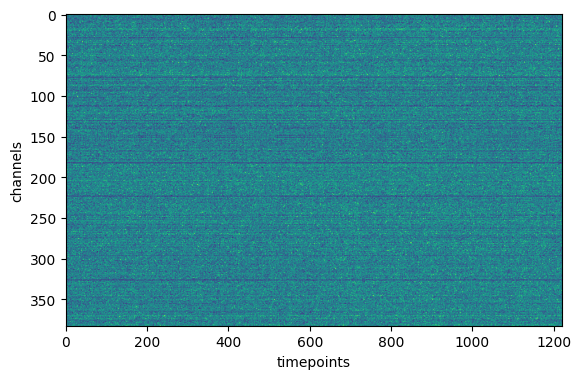

In [13]:
stimuli_names = list(neural_data_norm.keys())
curr_data = neural_data_norm[stimuli_names[7]][:,:,0]
data_normalized_per_row = (curr_data - curr_data.min(axis=1, keepdims=True)) / (curr_data.max(axis=1, keepdims=True) - curr_data.min(axis=1, keepdims=True))
plt.imshow(data_normalized_per_row, aspect=2, cmap='viridis')
plt.ylabel("channels"); plt.xlabel("timepoints")

In [30]:
print(np.percentile(neu1, 2.5), np.percentile(neu1, 97.5))

0.0 0.1


In [40]:
np.percentile(neu1, 100, axis=1)

array([0.1, 0.1, 0.4, 0.1, 0.1, 0.2, 0.1, 0.1, 0.1, 0.2, 0.1, 0.3, 0.1,
       0.2, 0.2, 0.2, 0.1, 0.1, 0.1, 0.2, 0.1, 0.1, 0.2, 0.1, 0.2, 0.3,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.3, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.3, 0.1, 0.1, 0.2, 0.1, 0.1, 0.1, 0.2, 0.1, 0.1, 0.1,
       0.2, 0.1, 0.1, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.1, 0.2])

In [43]:
#np.percentile(neu)
floor = np.percentile(neu1, 2.5, axis=1)
ceiling = np.percentile(neu1, 97.5, axis=1)

In [ ]:
floor = np.percentile(neu1, 2.5, axis=0, keepdims=True)
ceiling = np.percentile(neu1, 97.5, axis=1, keepdims=True)
scale = ceiling - floor

neu1_norm = np.divide(
    neu1 - floor,
    scale,
    out=np.zeros_like(neu1),
    where=scale != 0
)

neu1_norm_clipped = np.clip(neu1_norm, 0, 1)

In [88]:
ceiling[7]

array([0.])

In [86]:
print((neu1[7,:] - floor)/scale[7,np.newaxis])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


/var/folders/nw/yf48zdjj1m5012281wx_pzhc0000gn/T/ipykernel_6871/3581052833.py:1: RuntimeWarning: divide by zero encountered in divide
  print((neu1[7,:] - floor)/scale[7,np.newaxis])
/var/folders/nw/yf48zdjj1m5012281wx_pzhc0000gn/T/ipykernel_6871/3581052833.py:1: RuntimeWarning: invalid value encountered in divide
  print((neu1[7,:] - floor)/scale[7,np.newaxis])


In [95]:
np.var(neu1, axis=1)

array([2.08831745e-04, 1.05554202e-04, 2.55172109e-03, 1.33946589e-04,
       1.15037146e-04, 1.24952844e-04, 2.08831745e-04, 9.60524422e-05,
       1.05554202e-04, 1.07710443e-03, 1.24501275e-04, 1.92861262e-03,
       1.52780770e-04, 1.82170371e-04, 7.04616632e-04, 2.28230387e-04,
       9.60524422e-05, 1.80890926e-04, 8.65318671e-05, 9.57175287e-04,
       8.65318671e-05, 1.90223348e-04, 5.35127817e-04, 1.05554202e-04,
       2.46763522e-04, 5.23255322e-04, 1.62169637e-04, 1.43373087e-04,
       2.82512717e-04, 2.08831745e-04, 1.71539690e-04, 8.65318671e-05,
       3.86467613e-05, 9.60524422e-05, 5.78572497e-05, 1.17840636e-03,
       3.86467613e-05, 8.65318671e-05, 1.33946589e-04, 1.24501275e-04,
       1.24501275e-04, 6.19288949e-04, 1.71539690e-04, 1.52780770e-04,
       1.42193364e-03, 2.08831745e-04, 1.90223348e-04, 6.74342709e-05,
       2.74422110e-04, 2.18107720e-04, 1.43373087e-04, 1.24501275e-04,
       9.34051202e-04, 8.65318671e-05, 2.08831745e-04, 1.17080495e-03,
      

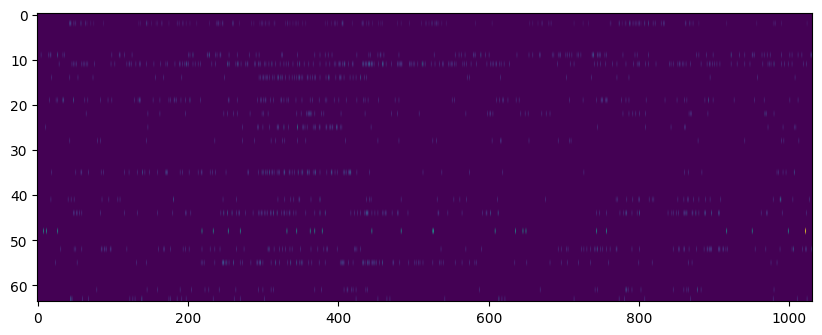

In [91]:
fig, ax = plt.subplots(figsize=(10, 6))  # creates both fig and ax
ax.imshow(neu1_norm[:, :])
ax.set_aspect(6)
plt.show()

In [79]:
max(neu1_norm[6,:])

np.float64(0.0)